In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import time
from model.RadixSpline import *
from model.RS_Meta import *

In [2]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/longtitude_china.double','rb')
data = datafile.read(8)
data_len, = struct.unpack('d', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('d',data_bin)
    data.append(data_unix)

100%|██████████| 1783525/1783525 [00:01<00:00, 1290610.57it/s]


In [5]:
epsilon_list = list(range(25,300,25))
RS_Index_seg_num = []
RS_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    RS_Index = RadixSpline(epsilon)
    RS_Index.learn_index(data)
    RS_Index_seg_num.append(RS_Index.seg_num)
    RS_Index_mae.append(RS_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  2%|▏         | 28646/1783525 [00:00<00:06, 286454.81it/s]

25 6070 10.680933544525589


  2%|▏         | 34275/1783525 [00:00<00:05, 342744.61it/s]

50 3129 22.655009601771773


  2%|▏         | 34365/1783525 [00:00<00:05, 343645.41it/s]

75 2179 34.901807375842786


  2%|▏         | 34647/1783525 [00:00<00:05, 346469.50it/s]

100 1691 47.65439677044056


  2%|▏         | 35114/1783525 [00:00<00:04, 351134.47it/s]

125 1399 59.96135293870285


  2%|▏         | 34624/1783525 [00:00<00:05, 346233.73it/s]

150 1191 72.47697957696136


  2%|▏         | 35233/1783525 [00:00<00:04, 351731.58it/s]

175 1056 85.19315961368638


  2%|▏         | 35344/1783525 [00:00<00:04, 353433.60it/s]

200 948 97.80350990314125


  2%|▏         | 35373/1783525 [00:00<00:04, 353723.59it/s]

225 857 111.68887792433523


  2%|▏         | 35385/1783525 [00:00<00:04, 353846.96it/s]

250 778 122.39706480144658


  2%|▏         | 35331/1783525 [00:00<00:04, 353306.97it/s]

275 713 135.4227644692393


  2%|▏         | 35551/1783525 [00:00<00:04, 355506.95it/s]

300 662 147.15770510646053


  2%|▏         | 35023/1783525 [00:00<00:05, 349510.36it/s]

325 622 159.87863528686168


  2%|▏         | 35561/1783525 [00:00<00:04, 355600.17it/s]

350 593 172.4278566322311


100%|██████████| 1783525/1783525 [00:04<00:00, 376571.92it/s]

375 564 208.05730561668605


4.813776370386282

In [8]:
epsilon_list = list(range(25,300,25))
RS_Meta_Index_seg_num_withBound = []
RS_Meta_Index_mae_withBound = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    RS_Meta_Index = RS_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    RS_Meta_Index.learn_index_lookahead(data,lookn=400)
    RS_Meta_Index_seg_num_withBound.append(RS_Meta_Index.seg_num)
    RS_Meta_Index_mae_withBound.append(RS_Meta_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  2%|▏         | 29574/1783525 [00:00<00:05, 295735.35it/s]

27 6237 10.167422940525084


  2%|▏         | 30493/1783525 [00:00<00:05, 304304.17it/s]

106 3231 20.832428477313186


  2%|▏         | 31779/1783525 [00:00<00:05, 317784.24it/s]

161 2282 31.881983151343547


  2%|▏         | 32025/1783525 [00:00<00:05, 320245.72it/s]

185 1757 42.977707629553834


  2%|▏         | 32787/1783525 [00:00<00:05, 327864.06it/s]

196 1464 54.93861986795812


  2%|▏         | 33171/1783525 [00:00<00:05, 330702.67it/s]

432 1265 65.39218962447961


  2%|▏         | 33231/1783525 [00:00<00:05, 332309.52it/s]

476 1109 76.1781090817342


  2%|▏         | 33348/1783525 [00:00<00:05, 333475.55it/s]

424 984 87.46155058101232


  2%|▏         | 33834/1783525 [00:00<00:05, 338337.90it/s]

387 906 98.28916555697285


  2%|▏         | 33877/1783525 [00:00<00:05, 337748.45it/s]

354 828 136.26186568733266


  2%|▏         | 34194/1783525 [00:00<00:05, 341932.99it/s]

378 774 145.4462056881737


  2%|▏         | 34109/1783525 [00:00<00:05, 341089.51it/s]

400 722 154.40581096424216


  1%|▏         | 25225/1783525 [00:00<00:06, 251634.70it/s]

429 679 162.66900323796975


  2%|▏         | 34550/1783525 [00:00<00:05, 345499.51it/s]

464 638 171.66910416170225


100%|██████████| 1783525/1783525 [00:04<00:00, 366629.56it/s]

496 616 181.20634249589997


5.088070106009642

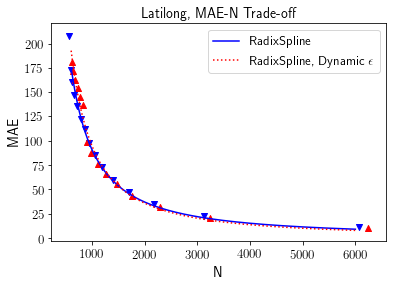

In [23]:
plt.rcParams["text.usetex"] = True
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('Latilong, MAE-N Trade-off',fontsize=14)
plt.xlabel('N',fontsize=14)
plt.ylabel('MAE',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
x = np.arange(600,6000)
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,RS_Index_seg_num,RS_Index_mae)
p2,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
#p3,_ = curve_fit(func,PGM_Index_seg_num,PGM_Index_mae)
#p4,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='RadixSpline')
plt.scatter(RS_Index_seg_num, RS_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='RadixSpline, Dynamic $\epsilon$')
plt.scatter(RS_Meta_Index_seg_num_withBound, RS_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.legend(fontsize=13)
#plt.savefig("{}.pdf".format("results/RadixSpline/Longitude_tradeoff_25"), bbox_inches='tight', pad_inches=0)

In [21]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2

(175230.11932189533, 173415.7617159472)

In [6]:
seg_err_list = np.array(RS_Index_mae)*data_len/np.array(RS_Index_seg_num)
RS_Random_Index_seg_num = []
RS_Random_Index_mae = []
starttime = time.perf_counter()
epsilon_high_list = list(range(50,700,100))
for i in range(len(epsilon_high_list)):
    RS_Random_Index = RS_Random(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=epsilon_high_list[i],withBound=True)
    RS_Random_Index.learn_index_lookahead(data,lookn=400)
    RS_Random_Index_seg_num.append(RS_Random_Index.seg_num)
    RS_Random_Index_mae.append(RS_Random_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  3%|▎         | 60520/1783525 [00:00<00:02, 605194.81it/s]

6126 9.583805665746205


  4%|▎         | 64862/1783525 [00:00<00:02, 648617.53it/s]

2184 31.09437210019484


  4%|▎         | 65650/1783525 [00:00<00:02, 656494.37it/s]

1456 50.85854753928316


  4%|▎         | 65968/1783525 [00:00<00:02, 659679.06it/s]

1100 72.80810978259346


  4%|▎         | 66069/1783525 [00:00<00:02, 659635.35it/s]

878 98.42962728304902


  4%|▎         | 66155/1783525 [00:00<00:02, 658866.03it/s]

749 114.88734780841311


100%|██████████| 1783525/1783525 [00:02<00:00, 734398.98it/s]

650 140.73121823355433


-1.1973011896014214

In [7]:
RS_Poly_Index_seg_num = []
RS_Poly_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    RS_Poly_Index = RS_Poly(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    RS_Poly_Index.learn_index_lookahead(data,lookn=400)
    RS_Poly_Index_seg_num.append(RS_Poly_Index.seg_num)
    RS_Poly_Index_mae.append(RS_Poly_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  1%|          | 10511/1783525 [00:00<00:16, 105109.10it/s]

6566 6.405254201651225


  1%|          | 15869/1783525 [00:00<00:11, 158689.77it/s]

4240 10.199745447919149


  1%|          | 19076/1783525 [00:00<00:09, 190758.36it/s]

3358 13.390650537559047


  1%|          | 20618/1783525 [00:00<00:08, 206153.16it/s]

2935 15.7783720441261


  1%|▏         | 24073/1783525 [00:00<00:07, 238792.81it/s]

2670 17.955801012040762


  1%|▏         | 24998/1783525 [00:00<00:07, 248871.26it/s]

2335 20.997288515720275


  1%|▏         | 25531/1783525 [00:00<00:06, 254580.06it/s]

2211 22.346376978175243


  2%|▏         | 27436/1783525 [00:00<00:06, 272172.14it/s]

2077 24.200949243772865


  2%|▏         | 29376/1783525 [00:00<00:05, 293758.18it/s]

1987 25.443675866612466


  2%|▏         | 30202/1783525 [00:00<00:05, 299455.75it/s]

1847 27.977028076421693


  2%|▏         | 30993/1783525 [00:00<00:05, 309928.82it/s]

1806 28.774834667302112


  2%|▏         | 32688/1783525 [00:00<00:05, 325490.44it/s]

1752 29.853230540642826


  2%|▏         | 33664/1783525 [00:00<00:05, 336593.78it/s]

1671 31.73024600159796


  2%|▏         | 33991/1783525 [00:00<00:05, 337100.55it/s]

1632 32.924082925666866


100%|██████████| 1783525/1783525 [00:04<00:00, 422437.13it/s]

1598 33.60721828962308


-5.979995515445868

In [ ]:
RS_LS_Index_seg_num = []
RS_LS_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    RS_LS_Index = RS_LS(epsilon_list[i],init_epsilon=range(25,400,50),low=1,high=1000,withBound=True)
    RS_LS_Index.learn_index_lookahead(data,lookn=400)
    RS_LS_Index_seg_num.append(RS_LS_Index.seg_num)
    RS_LS_Index_mae.append(RS_LS_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

 52%|█████▏    | 928400/1783525 [04:29<06:40, 2135.15it/s]

In [ ]:
plt.rcParams["text.usetex"] = True
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('IoT, MAE-\#SEG Trade-off')
plt.xlabel('\#SEG')
plt.ylabel('MAE')
x = np.arange(550,6000)
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,RS_Index_seg_num,RS_Index_mae)
p2,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
p3,_ = curve_fit(func,RS_Random_Index_seg_num,RS_Random_Index_mae)
p4,_ = curve_fit(func,RS_Poly_Index_seg_num,RS_Poly_Index_mae)
p5,_ = curve_fit(func,RS_LS_Index_seg_num,RS_LS_Index_mae)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='FITing-Tree')
plt.scatter(RS_Index_seg_num, RS_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='FITing-Tree, Dynamic $\epsilon$')
plt.scatter(RS_Meta_Index_seg_num_withBound, RS_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.plot(x,p3[0]*x**p3[1],c=colors[2], linestyle=linestyles[2], label='FITing-Tree, Random $\epsilon$')
plt.scatter(RS_Random_Index_seg_num, RS_Random_Index_mae,c=colors[2],marker=markers[2])
plt.plot(x,p4[0]*x**p4[1],c=colors[3], linestyle=linestyles[3], label='FITing-Tree, Poly $\epsilon$')
plt.scatter(RS_Poly_Index_seg_num, RS_Poly_Index_mae,c=colors[3],marker=markers[3])
plt.plot(x,p5[0]*x**p5[1],c=colors[4], linestyle=linestyles[4], label='FITing-Tree, LS $\epsilon$')
plt.scatter(RS_LS_Index_seg_num, RS_LS_Index_mae,c=colors[4],marker=markers[4])
plt.legend()
#plt.savefig("{}.pdf".format("results/Main_exp/Longitude_tradeoff_22"), bbox_inches='tight', pad_inches=0)

In [ ]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC4 = calc_AUC(x,p4[0]*x**p4[1])
AUC5 = calc_AUC(x,p5[0]*x**p5[1])
AUC1,AUC2,AUC3,AUC4,AUC5

In [26]:
epsilon_list = list(range(25,400,25))
RS_Meta_Index_seg_num_withBound_list = []
RS_Meta_Index_mae_withBound_list = []
look_list = list(range(200,2000,200))
for lookn in look_list:    
    RS_Meta_Index_seg_num_withBound = []
    RS_Meta_Index_mae_withBound = []
    for i in range(len(epsilon_list)):
        RS_Meta_Index = RS_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
        RS_Meta_Index.learn_index_lookahead(data,lookn=lookn)
        RS_Meta_Index_seg_num_withBound.append(RS_Meta_Index.seg_num)
        RS_Meta_Index_mae_withBound.append(RS_Meta_Index.mae)
    RS_Meta_Index_seg_num_withBound_list.append(RS_Meta_Index_seg_num_withBound)
    RS_Meta_Index_mae_withBound_list.append(RS_Meta_Index_mae_withBound)

  2%|▏         | 29282/1783525 [00:00<00:05, 292814.69it/s]

50 6431 9.87659214196605


  2%|▏         | 31048/1783525 [00:00<00:05, 309732.24it/s]

53 3280 20.464214406862816


  2%|▏         | 31764/1783525 [00:00<00:05, 317638.79it/s]

78 2307 31.399832354466575


  2%|▏         | 31975/1783525 [00:00<00:05, 319008.74it/s]

110 1791 42.71391934511711


  2%|▏         | 32335/1783525 [00:00<00:05, 322677.92it/s]

354 1491 53.39697116665031


  2%|▏         | 32624/1783525 [00:00<00:05, 326237.20it/s]

444 1290 63.928733266985326


  2%|▏         | 32695/1783525 [00:00<00:05, 326943.30it/s]

456 1135 75.1933463225915


  2%|▏         | 33020/1783525 [00:00<00:05, 330194.02it/s]

631 1019 85.6693172229153


  2%|▏         | 33559/1783525 [00:00<00:05, 335586.32it/s]

599 931 96.18748153235867


  2%|▏         | 33866/1783525 [00:00<00:05, 337637.98it/s]

418 855 106.04071319437631


  2%|▏         | 33309/1783525 [00:00<00:05, 333081.58it/s]

454 799 117.64053377440743


  2%|▏         | 33814/1783525 [00:00<00:05, 338136.29it/s]

365 753 148.8580468454325


  2%|▏         | 33781/1783525 [00:00<00:05, 337807.10it/s]

387 707 157.93795657476065


  2%|▏         | 33030/1783525 [00:00<00:05, 328836.57it/s]

408 660 169.1004477088911


  3%|▎         | 50662/1783525 [00:00<00:06, 249069.18it/s]

432 619 180.34635286861692


  2%|▏         | 29327/1783525 [00:00<00:05, 293267.48it/s]

27 6237 10.167422940525084


  2%|▏         | 30203/1783525 [00:00<00:05, 302025.97it/s]

106 3231 20.832428477313186


  2%|▏         | 31798/1783525 [00:00<00:05, 317974.24it/s]

161 2282 31.881983151343547


  2%|▏         | 32304/1783525 [00:00<00:05, 323038.77it/s]

185 1757 42.977707629553834


  2%|▏         | 32788/1783525 [00:00<00:05, 327874.06it/s]

196 1464 54.93861986795812


  2%|▏         | 32927/1783525 [00:00<00:05, 329264.03it/s]

432 1265 65.39218962447961


  2%|▏         | 33002/1783525 [00:00<00:05, 330016.38it/s]

476 1109 76.1781090817342


  2%|▏         | 32966/1783525 [00:00<00:05, 329655.60it/s]

424 984 87.46155058101232


  2%|▏         | 33731/1783525 [00:00<00:05, 337303.08it/s]

387 906 98.28916555697285


  2%|▏         | 33013/1783525 [00:00<00:05, 328174.24it/s]

354 828 136.26798559033375


  2%|▏         | 33014/1783525 [00:00<00:05, 329520.45it/s]

370 772 145.62788074178943


  2%|▏         | 33030/1783525 [00:00<00:05, 330052.44it/s]

412 721 154.45844773692548


  1%|          | 20600/1783525 [00:00<00:08, 204403.68it/s]

427 678 162.85086500049061


  2%|▏         | 34270/1783525 [00:00<00:05, 342229.53it/s]

470 636 171.49645000770946


  2%|▏         | 27031/1783525 [00:00<00:06, 269963.98it/s]

510 615 180.51114169972385


  2%|▏         | 29210/1783525 [00:00<00:06, 292098.19it/s]

26 6129 10.347392383061633


  2%|▏         | 30991/1783525 [00:00<00:05, 309909.56it/s]

52 3185 21.316637557645674


  2%|▏         | 31642/1783525 [00:00<00:05, 316412.00it/s]

139 2247 32.17140998864608


  2%|▏         | 32842/1783525 [00:00<00:05, 328416.40it/s]

202 1737 43.91731655009041


  2%|▏         | 32775/1783525 [00:00<00:05, 327749.53it/s]

362 1457 54.661173799077666


  2%|▏         | 31201/1783525 [00:00<00:05, 310812.78it/s]

449 1244 66.1359111871154


  2%|▏         | 33229/1783525 [00:00<00:05, 332289.52it/s]

426 1101 80.5516575321344


  2%|▏         | 33878/1783525 [00:00<00:05, 337265.39it/s]

407 985 87.52353681613658


  2%|▏         | 33784/1783525 [00:00<00:05, 337831.46it/s]

331 891 127.20434252393434


  2%|▏         | 33921/1783525 [00:00<00:05, 339203.85it/s]

367 812 137.62558360550034


  2%|▏         | 33281/1783525 [00:00<00:05, 332796.83it/s]

390 750 147.3245567065222


  2%|▏         | 34033/1783525 [00:00<00:05, 340327.08it/s]

436 709 155.79082995752793


  2%|▏         | 33811/1783525 [00:00<00:05, 338106.29it/s]

457 662 165.37481504324302


  2%|▏         | 34269/1783525 [00:00<00:05, 341056.72it/s]

504 623 172.45769361236876


  2%|▏         | 27425/1783525 [00:00<00:06, 274245.03it/s]

967 597 178.29522714848403


  2%|▏         | 30208/1783525 [00:00<00:05, 302073.09it/s]

26 6063 10.455621872415582


  2%|▏         | 31446/1783525 [00:00<00:05, 314459.55it/s]

52 3148 21.689785116552894


  2%|▏         | 32060/1783525 [00:00<00:05, 320593.43it/s]

1 2233 32.68481294066525


  2%|▏         | 32824/1783525 [00:00<00:05, 328237.97it/s]

178 1726 44.210702401143806


  2%|▏         | 33072/1783525 [00:00<00:05, 330713.22it/s]

377 1452 67.99665549964256


  2%|▏         | 32955/1783525 [00:00<00:05, 329549.53it/s]

411 1238 77.16861047644412


  2%|▏         | 30390/1783525 [00:00<00:05, 303895.94it/s]

582 1088 80.0008152394836


  2%|▏         | 33310/1783525 [00:00<00:05, 333099.52it/s]

568 975 116.37377104329909


  2%|▏         | 33705/1783525 [00:00<00:05, 337043.89it/s]

578 878 126.25599136541399


  2%|▏         | 33603/1783525 [00:00<00:05, 336024.71it/s]

664 809 136.82058227386776


  2%|▏         | 34182/1783525 [00:00<00:05, 341814.62it/s]

687 744 145.88444232629203


  2%|▏         | 33602/1783525 [00:00<00:05, 336015.51it/s]

707 695 156.35195189302084


  2%|▏         | 33672/1783525 [00:00<00:05, 336713.90it/s]

737 662 165.36733210916583


  2%|▏         | 33878/1783525 [00:00<00:05, 338778.71it/s]

869 620 174.16300472379137


  1%|▏         | 23023/1783525 [00:00<00:07, 230226.93it/s]

1000 589 181.0935736813333


  2%|▏         | 30022/1783525 [00:00<00:05, 300214.56it/s]

26 6001 10.56582890623905


  2%|▏         | 31259/1783525 [00:00<00:05, 312587.32it/s]

52 3123 21.805867593669838


  2%|▏         | 32070/1783525 [00:00<00:05, 320692.66it/s]

145 2196 32.95415483382627


  2%|▏         | 31864/1783525 [00:00<00:05, 318634.23it/s]

199 1713 44.738120856169665


  2%|▏         | 32766/1783525 [00:00<00:05, 327430.80it/s]

234 1446 55.987778696682135


  2%|▏         | 32985/1783525 [00:00<00:05, 329843.24it/s]

393 1235 77.8463682875205


  2%|▏         | 32450/1783525 [00:00<00:05, 324493.35it/s]

434 1084 81.93917158436243


  2%|▏         | 32496/1783525 [00:00<00:05, 324954.11it/s]

584 972 118.8059427257818


  2%|▏         | 33662/1783525 [00:00<00:05, 336612.30it/s]

605 878 128.13752372408572


  2%|▏         | 33811/1783525 [00:00<00:05, 338109.52it/s]

634 809 135.48764609411137


  2%|▏         | 33952/1783525 [00:00<00:05, 338703.10it/s]

683 741 146.08349588595618


  2%|▏         | 34013/1783525 [00:00<00:05, 340123.84it/s]

795 689 156.0342013708807


  2%|▏         | 34253/1783525 [00:00<00:05, 342522.98it/s]

705 654 166.13848249954444


  2%|▏         | 34198/1783525 [00:00<00:05, 341974.62it/s]

857 617 174.17697368974362


  2%|▏         | 27403/1783525 [00:00<00:06, 274027.65it/s]

922 589 183.22086710306837


  2%|▏         | 30227/1783525 [00:00<00:05, 302219.85it/s]

26 5970 10.690380005887217


  2%|▏         | 31202/1783525 [00:00<00:05, 312018.07it/s]

52 3090 21.99883825570149


  2%|▏         | 32125/1783525 [00:00<00:05, 321248.01it/s]

135 2175 33.36123070884905


  2%|▏         | 32589/1783525 [00:00<00:05, 325887.98it/s]

200 1708 45.32694018867131


  2%|▏         | 32806/1783525 [00:00<00:05, 328054.06it/s]

232 1437 56.675379935801296


  2%|▏         | 32620/1783525 [00:00<00:05, 326195.64it/s]

401 1229 78.50344906855806


  2%|▏         | 32606/1783525 [00:00<00:05, 326054.87it/s]

283 1080 78.54974951290282


  2%|▏         | 33525/1783525 [00:00<00:05, 335247.92it/s]

566 968 118.77628628698784


  1%|          | 20644/1783525 [00:00<00:08, 206437.74it/s]

597 872 127.22552809744747


  2%|▏         | 30941/1783525 [00:00<00:05, 309403.66it/s]

637 811 135.43006237647356


  2%|▏         | 33651/1783525 [00:00<00:05, 336501.50it/s]

693 735 145.92616924349252


  1%|          | 18422/1783525 [00:00<00:09, 181284.99it/s]

773 691 155.87907038028624


  2%|▏         | 27663/1783525 [00:00<00:06, 276624.99it/s]

762 654 165.93694565537348


  2%|▏         | 34219/1783525 [00:00<00:05, 342184.62it/s]

824 613 174.4483592884877


  2%|▏         | 27505/1783525 [00:00<00:06, 275048.95it/s]

948 591 182.8189798292707


  2%|▏         | 30286/1783525 [00:00<00:05, 302855.23it/s]

26 5910 10.814578433159053


  2%|▏         | 31523/1783525 [00:00<00:05, 315229.55it/s]

52 3065 22.17153390056209


  2%|▏         | 31936/1783525 [00:00<00:05, 318532.51it/s]

152 2167 33.63156614008775


  2%|▏         | 32712/1783525 [00:00<00:05, 327027.53it/s]

189 1695 45.67266901220897


  1%|          | 17608/1783525 [00:00<00:10, 176076.81it/s]

351 1423 61.36152731248511


  2%|▏         | 33605/1783525 [00:00<00:05, 336046.31it/s]

384 1233 69.22300388276027


  2%|▏         | 33162/1783525 [00:00<00:05, 331613.20it/s]

280 1079 78.86611233372115


  2%|▏         | 33656/1783525 [00:00<00:05, 336555.51it/s]

526 964 119.5262679244754


  1%|          | 22133/1783525 [00:00<00:07, 220588.66it/s]

597 868 127.37045682006139


  2%|▏         | 32996/1783525 [00:00<00:05, 329954.81it/s]

590 811 135.59564345888057


  2%|▏         | 33951/1783525 [00:00<00:05, 339502.23it/s]

715 737 145.79288487685903


  2%|▏         | 34211/1783525 [00:00<00:05, 342109.51it/s]

675 692 155.1644299911692


  2%|▏         | 33218/1783525 [00:00<00:05, 332177.94it/s]

754 649 164.64422253683014


  2%|▏         | 34327/1783525 [00:00<00:05, 342809.36it/s]

831 613 166.42010681095022


  2%|▏         | 27438/1783525 [00:00<00:06, 274355.41it/s]

879 587 174.71265107021208


  2%|▏         | 29788/1783525 [00:00<00:05, 297878.86it/s]

26 5880 10.936133780014298


  2%|▏         | 31278/1783525 [00:00<00:05, 312776.57it/s]

52 3065 22.47994729538414


  2%|▏         | 32237/1783525 [00:00<00:05, 322362.62it/s]

150 2164 33.8721458908622


  2%|▏         | 32715/1783525 [00:00<00:05, 326372.18it/s]

190 1683 45.95780827294263


  2%|▏         | 33149/1783525 [00:00<00:05, 331485.57it/s]

242 1422 57.536955187059334


  2%|▏         | 32985/1783525 [00:00<00:05, 329410.50it/s]

361 1219 70.30950729594483


  2%|▏         | 33500/1783525 [00:00<00:05, 334997.92it/s]

481 1062 109.1230703242175


  2%|▏         | 33765/1783525 [00:00<00:05, 337647.91it/s]

504 958 119.49496306471734


  2%|▏         | 33891/1783525 [00:00<00:05, 337631.22it/s]

564 864 127.49903645869837


  2%|▏         | 33578/1783525 [00:00<00:05, 335771.51it/s]

628 804 131.0940569938745


  2%|▏         | 33780/1783525 [00:00<00:05, 337793.88it/s]

702 736 138.71372086177655


  2%|▏         | 33039/1783525 [00:00<00:05, 328494.21it/s]

635 693 150.112960008971


  2%|▏         | 34316/1783525 [00:00<00:05, 341834.33it/s]

737 651 160.9883405054597


  2%|▏         | 34159/1783525 [00:00<00:05, 341587.07it/s]

790 615 167.4029744466716


  2%|▏         | 27438/1783525 [00:00<00:06, 273890.51it/s]

789 586 177.1002621213608


  2%|▏         | 28713/1783525 [00:00<00:06, 287124.80it/s]

26 5848 11.014999509398523


  2%|▏         | 31168/1783525 [00:00<00:05, 311673.61it/s]

52 3043 22.475875583465328


  2%|▏         | 31936/1783525 [00:00<00:05, 319334.42it/s]

147 2148 34.082171542310874


  2%|▏         | 32319/1783525 [00:00<00:05, 323188.00it/s]

194 1673 46.191449517107976


  2%|▏         | 32918/1783525 [00:00<00:05, 329177.96it/s]

240 1418 57.544782383201806


  2%|▏         | 32985/1783525 [00:00<00:05, 328876.46it/s]

395 1214 71.09587362105943


  2%|▏         | 33554/1783525 [00:00<00:05, 335533.12it/s]

436 1062 101.42580563771183


  2%|▏         | 33147/1783525 [00:00<00:05, 331465.57it/s]

461 943 113.03774996145275


  2%|▏         | 33418/1783525 [00:00<00:05, 334158.81it/s]

538 866 122.0815245090481


  2%|▏         | 33030/1783525 [00:00<00:05, 328483.37it/s]

554 799 132.80507758511936


  2%|▏         | 33956/1783525 [00:00<00:05, 339558.70it/s]

674 737 142.00815407689828


  2%|▏         | 34021/1783525 [00:00<00:05, 340209.51it/s]

684 684 148.41921812141686


  2%|▏         | 34173/1783525 [00:00<00:05, 341728.70it/s]

786 653 157.76713082238825


  2%|▏         | 34329/1783525 [00:00<00:05, 341684.67it/s]

795 618 167.72237170771365


100%|██████████| 1783525/1783525 [00:04<00:00, 367219.30it/s]

823 582 178.09046635174724


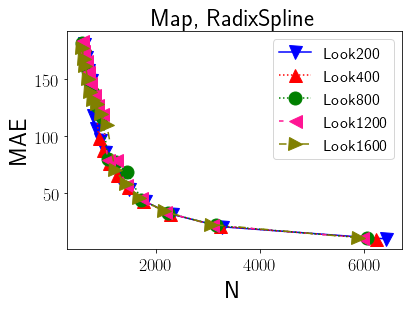

In [35]:
markers= ["v","^",1, "o",1, "<",1, ">", "1", "2", "3", "4"]
colors = ["b", "r", 1,"g", "purple", "deeppink", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]
x = np.arange(2500,21000)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.title('Map, RadixSpline')
plt.xlabel('N')
plt.ylabel('MAE')
def func(x,a,b):
    return a * x**b
i=0
RS_Meta_Index_seg_num_withBound = RS_Meta_Index_seg_num_withBound_list[i]
RS_Meta_Index_mae_withBound = RS_Meta_Index_mae_withBound_list[i]
p,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
plt.plot(RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound,linestyle=linestyles[i], label='Look'+str(look_list[i]),color=colors[i],marker=markers[i],markersize=13)
for i in range(1,len(RS_Meta_Index_mae_withBound_list),2):
    RS_Meta_Index_seg_num_withBound = RS_Meta_Index_seg_num_withBound_list[i]
    RS_Meta_Index_mae_withBound = RS_Meta_Index_mae_withBound_list[i]
    p,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
    plt.plot(RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound,linestyle=linestyles[i], label='Look'+str(look_list[i]),color=colors[i],marker=markers[i],markersize=13)
plt.legend()
#plt.savefig("{}.pdf".format("results/RadixSpline/Map_lookn_26"), bbox_inches='tight', pad_inches=0)